In [1]:
import sys
sys.path.append('..')

In [2]:
import sympy 
from solver_equation import solve_eq_method_nuthona, solve_eq_simple_iteration
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = sympy.symbols('x')
f = sympy.cos(x)+0.25*x-0.5
df = sympy.diff(f,x)
ddf = sympy.diff(f,x,x)

In [4]:
a = -5
b = 5
eps_list = np.arange(0.9,10**(-3),-10**(-3))

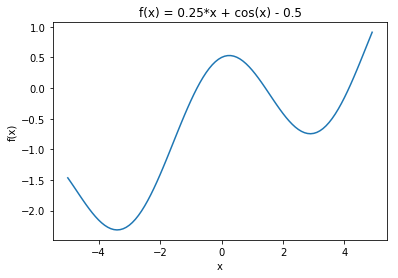

In [5]:
t = np.arange(a,b,0.1)
y = np.array([f.subs(x,i) for i in t])
plt.title(f'f(x) = {f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(t,y)

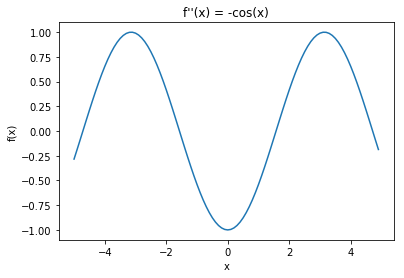

In [6]:
t = np.arange(a,b,0.1)
y = np.array([ddf.subs(x,i) for i in t])
plt.title(f"f''(x) = {ddf}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(t,y)

In [7]:
# f(a)*f(b) < 0
a,b = 4,5
f.subs(x,a)*f.subs(x,b) < 0 

True

In [8]:
# f(x_0)*f''(x_0) > 0
x_0 = (a+b)/2
f.subs(x,x_0)*ddf.subs(x,x_0) > 0 

True

root = 4.14608083010528
f(root) = 0.0


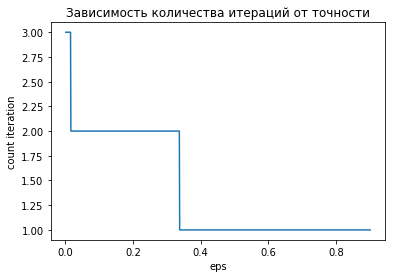

In [9]:
parameters = {
    "function": f,
    "xstart": x_0,
    "eps": 0.0001,
}
root,_ = solve_eq_method_nuthona(**parameters)
print(f'root = {root}')
print(f'f(root) = {round(f.subs(x,root).evalf(),5)}')
k_list = [solve_eq_method_nuthona(function=f,eps = eps,xstart=x_0)[1] for eps in eps_list]
plt.title('Зависимость количества итераций от точности')
plt.xlabel('eps')
plt.ylabel('count iteration')
plt.plot(eps_list,k_list)

In [10]:
# phi_x = (-sympy.cos(x)+0.5)/0.25 
# phi_x = sympy.atan(-0.25*x+0.5)
# p(x) = x - h*f(x)
phi_x = x - 0.1*f
dphi_x = sympy.diff(phi_x,x)
a = 1
b = 2

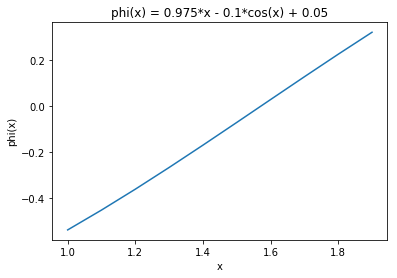

In [11]:
t = np.arange(a,b,0.1)
y = np.array([ddf.subs(x,i) for i in t])
plt.title(f"phi(x) = {phi_x}")
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.plot(t,y)

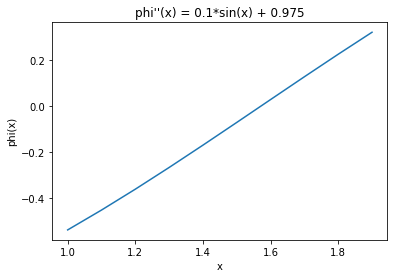

In [12]:
t = np.arange(a,b,0.1)
y = np.array([ddf.subs(x,i) for i in t])
plt.title(f"phi''(x) = {dphi_x}")
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.plot(t,y)

root = 4.14608075230690
f(root) = -0.0


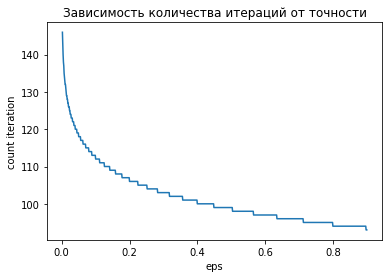

In [13]:
parameters = {
    "phi": phi_x,
    "xstart": (a+b)/2,
    "eps": 0.0001,
    "q": 0.9999,

}
root,_ = solve_eq_simple_iteration(**parameters)
print(f'root = {root}')
print(f'f(root) = {round(f.subs(x,root).evalf(),5)}')
k_list = [solve_eq_simple_iteration(phi=phi_x,eps = eps,q = 0.999,xstart = (a+b)/2)[1] for eps in eps_list]
plt.title('Зависимость количества итераций от точности')
plt.xlabel('eps')
plt.ylabel('count iteration')
plt.plot(eps_list,k_list)